# Özellik Eşleme
Görüntü işlemede nokta özelliği eşleşmesi, karmaşık bir sahnede belirtilen
bir hedefi tespit etmek için etkili bir yöntemdir. Bu yöntem, birden çok nesne yerine tek nesneleri algılar. Örneğin, bu yöntemi kullanarak, kişi dağınık bir görüntü üzerinde belirli bir kişiyi tanıyabilir, ancak başka herhangi bir kişiyi tanıyamaz.
Brute-Force eşleştiricisi, bir görüntüdeki bir özelliğin tanımlayıcısını başka bir görüntünün diğer tüm özellikleriyle eşleştirir ve mesafeye göre eşleşmeyi döndürür.
Tüm özelliklerle eşleşmeyi kontrol ettiği için yavaştır.
Ölçek değişmez özellik dönüşümü, anahtar noktaları ilk olarak bir dizi referans görüntüden çıkarılır ve saklanır.
Yeni görüntüdeki her bir özelliği bu saklanan veri ile ayrı ayrı karşılaştırarak ve öznitelik vektörlerinin Öklid mesafesine dayalı olarak aday eşleştirme özelliklerini bularak yeni bir görüntüde bir nesne tanınır.

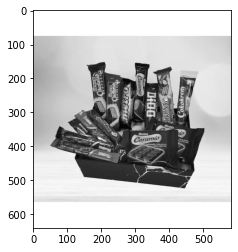

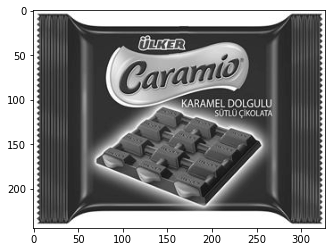

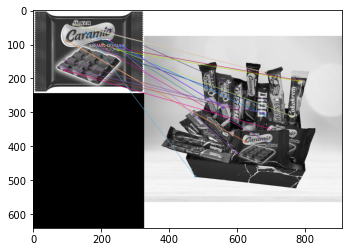

In [6]:
#kütüphaneleri import edelim
import cv2
import matplotlib.pyplot as plt
import numpy as np


#buyuk gorseli al
chos = cv2.imread("img/cikolatalar.jpg", 0)
plt.figure(),plt.imshow(chos,cmap="gray")

#bulunmasını istedigin gorseli al
cho = cv2.imread("img/cikolata.jpg", 0)
plt.figure(),plt.imshow(cho,cmap="gray")


#orb tanımlayıcı(kenar kose gibi nesneye ait ozellikleri buluruz)
orb= cv2.ORB_create()

#anahtar nokta tespiti
kp1,des1=orb.detectAndCompute(cho,None)
kp2,des2=orb.detectAndCompute(chos,None)

#varsayılan parametrelerle BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

#bf sayesinde esleme yapalim
matches = bf.match(des1, des2)

#mesafeye göre sıralayalım 
matches = sorted(matches, key = lambda x: x.distance)


#eslesmeleri görsellestirelim
plt.figure()
img_match= cv2.drawMatches(cho, kp1, chos, kp2, matches[:20], None, flags=2)
plt.imshow(img_match)



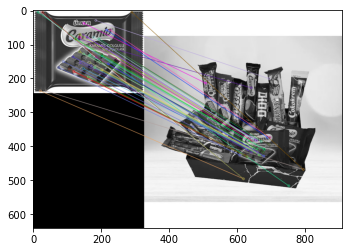

In [8]:
#sift yapalim
sift = cv2.xfeatures2d.SIFT_create()

#terkrar bf yapalım
bf = cv2.BFMatcher()

#sift ile anahtar nokta tespiti yapalım
kp1,des1=sift.detectAndCompute(cho,None)
kp2,des2=sift.detectAndCompute(chos,None)

#en iyi mach belirleyelim
matches = bf.knnMatch(des1,des2,k=2)

guzel_eslesme=[]
for match1, match2 in matches:
    if match1.distance<0.75*match2.distance:
        guzel_eslesme.append([match1])
        
plt.figure()
sift_match= cv2.drawMatchesKnn(cho, kp1, chos, kp2, guzel_eslesme, None, flags=2)
plt.imshow(sift_match)